# Chapter 2. Data and Sampling Distributions

In [1]:
%matplotlib inline

from pathlib import Path
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.utils import resample
import matplotlib.pylab as plt

In [2]:
ETF_DATA_MSCI  = 'data/iShares Core MSCI World UCITS ETF USD  EUNL.DE.csv'

# Sampling Distribution of a Statistic

In [3]:
etf_data = pd.read_csv(ETF_DATA_MSCI)['Adj Close']

#print(etf_data)

# 'Adjusted Closing Price' Spalte enthält eine zufällige Stichprobe von 1000 Einträgen aus der Spalte 'etf_data' des ursprünglichen DataFrames.
sample_data = pd.DataFrame({
    'Adjusted Closing Price': etf_data.sample(1000),
    'type': 'Data',
})

# 'Adjusted Closing Price' enthält den Durchschnittswert von 5 zufälligen Stichproben aus der Spalte 'etf_data' des ursprünglichen DataFrames.
sample_mean_05 = pd.DataFrame({
    'Adjusted Closing Price': [etf_data.sample(5).mean() for _ in range(1000)],
    'type': 'Mean of 5',
})

# 'Adjusted Closing Price' enthält den Durchschnittswert von 20 zufälligen Stichproben aus der Spalte 'etf_data' des ursprünglichen DataFrames.
sample_mean_20 = pd.DataFrame({
    'Adjusted Closing Price': [etf_data.sample(20).mean() for _ in range(1000)],
    'type': 'Mean of 20',
})

results = pd.concat([sample_data, sample_mean_05 , sample_mean_20])
print(results.head())

      Adjusted Closing Price  type
2262               48.824001  Data
1676               35.950001  Data
583                21.320000  Data
1618               31.700001  Data
2585               54.840000  Data


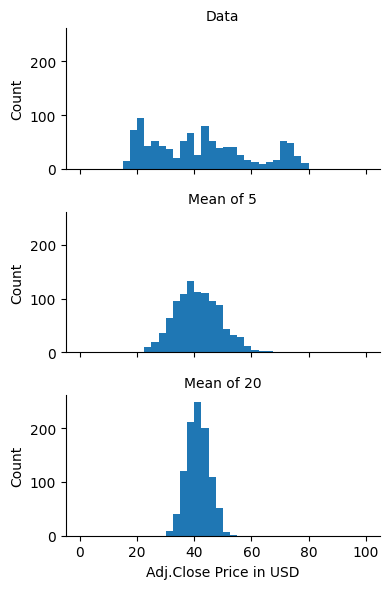

In [4]:
g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'Adjusted Closing Price', range=[0, 100], bins=40)
g.set_axis_labels('Adj.Close Price in USD', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

# The Bootstrap

In [5]:
results = []
for nrepeat in range(1000):
    sample = resample(etf_data)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {etf_data.median()}')
print(f'bias: {results.mean() - etf_data.median()}')
print(f'std. error: {results.std()}')

Bootstrap Statistics:
original: 39.09
bias: 0.050289987999995844
std. error: 0.27477212727101324


# Confidence Intervals für den Mittelwerrt

41.30592765749855
40.15035045


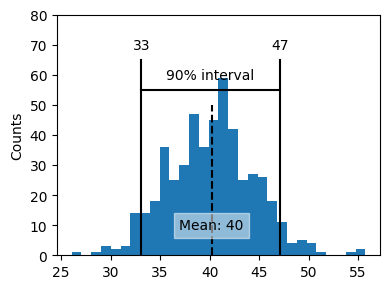

In [6]:
print(etf_data.mean())
np.random.seed(seed=3)  
# create a sample of 20 etf adj close value
sample20 = resample(etf_data, n_samples=20, replace=False)
print(sample20.mean())
results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()